# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

## $$f(x) = a + b * x^n$$

to some cubic data with noise.

In [10]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

## Some helper functions
The following functions will generate data and polynomial values.

In [11]:
def polynomials(X, degree=1):           # lets us converge on 
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):             # Takes monomial and puts them to a power
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):   # generates random values
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [12]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [13]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

### $$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generated from the function

### $$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

Coefficients: 
[-0.64253677]
Variance explained score: 0.17
Bias: 0.938508043635
Variance: 0.187629843349


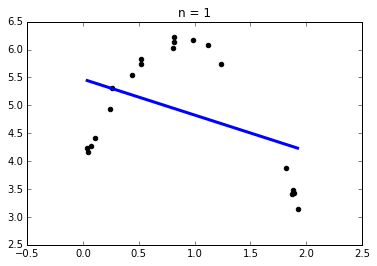

Coefficients: 
[-0.47294567]
Variance explained score: 0.39
Bias: 0.688741190648
Variance: 0.437396696336


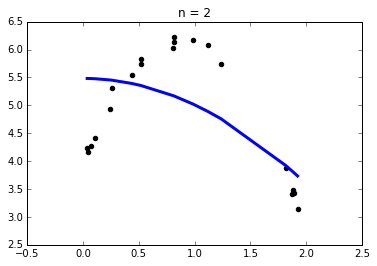

Coefficients: 
[-0.27672674]
Variance explained score: 0.51
Bias: 0.55453651722
Variance: 0.571601369764


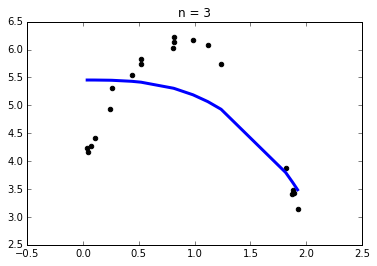

Coefficients: 
[-0.15214459]
Variance explained score: 0.57
Bias: 0.489371853483
Variance: 0.6367660335


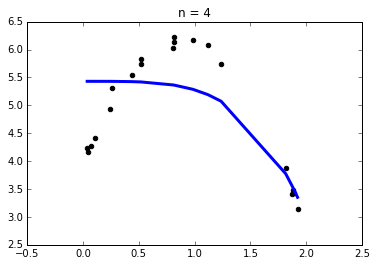

Coefficients: 
[-0.08190736]
Variance explained score: 0.59
Bias: 0.457053772029
Variance: 0.669084114955


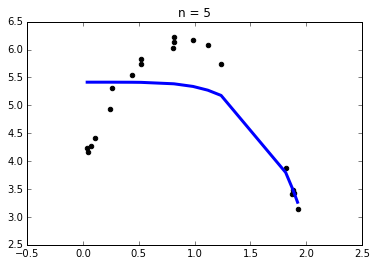

Coefficients: 
[-0.04372405]
Variance explained score: 0.61
Bias: 0.440552126967
Variance: 0.685585760016


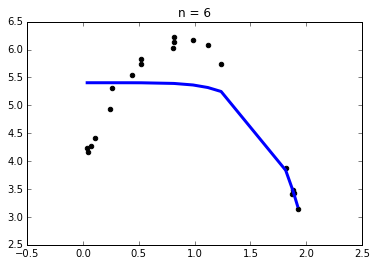

Coefficients: 
[-0.02324817]
Variance explained score: 0.62
Bias: 0.432067158672
Variance: 0.694070728311


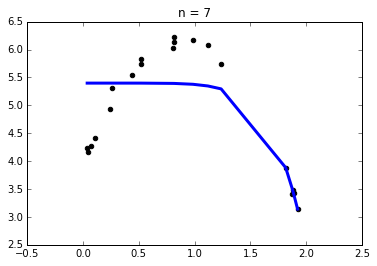

Coefficients: 
[-0.01233349]
Variance explained score: 0.62
Bias: 0.427909437389
Variance: 0.698228449594


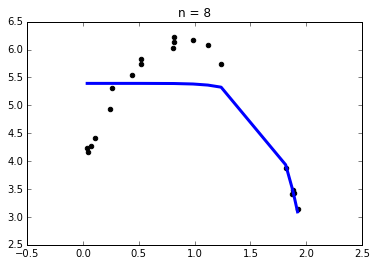

Coefficients: 
[-0.00653325]
Variance explained score: 0.62
Bias: 0.426259347918
Variance: 0.699878539066


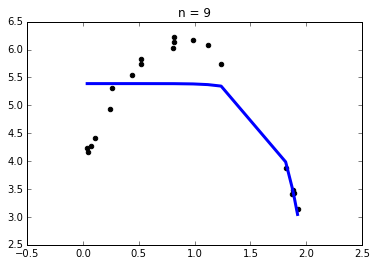

In [14]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    
    bias = np.mean((yhat - Y)**2)
    var = np.var(yhat)
    
    # The coefficients
    print 'Coefficients: \n', regr.coef_
    # Explained variance score: 1 is perfect prediction
    print 'Variance explained score: %.2f' % regr.score(X, Y)

    print "Bias: {bias}".format(bias=bias)
    print "Variance: {var}".format(var=var)
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

In first case high bias model could be good. If started with going to parabolic model and then had additional points be added to more linear or poor example then the variance would be much greater. 



It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

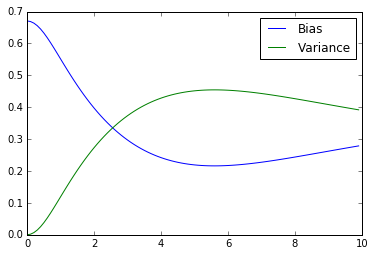

In [41]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    
    bias = np.mean((yhat - Y)**2)
    var = np.var(yhat)
    
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

('Coefficients: \n', array([-0.66394509]))
Variance score: 0.18
Residual sum of squares: 0.67
Bias: 0.550971681608
Variance: 0.119760193268


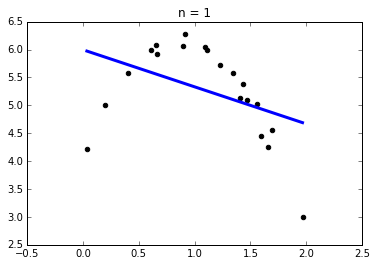

('Coefficients: \n', array([ 4.59250612, -2.65039148]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0160278281569
Variance: 0.654704046719


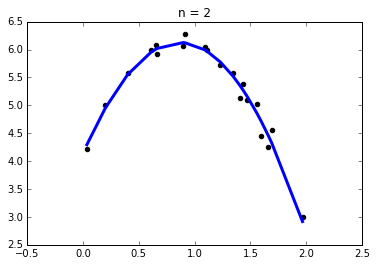

('Coefficients: \n', array([ 5.09265927, -3.27001526,  0.20743766]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0149543171425
Variance: 0.655777557733


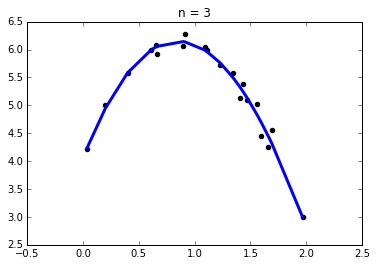

('Coefficients: \n', array([ 4.87517646, -2.782604  , -0.1638662 ,  0.09090472]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.014906121766
Variance: 0.65582575311


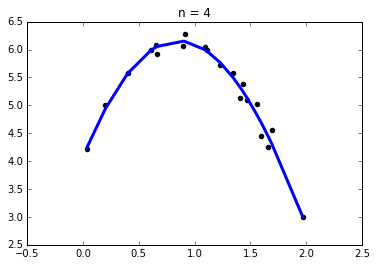

('Coefficients: \n', array([ 5.42148522, -4.68699655,  2.33159443, -1.29024432,  0.27224345]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0148116671508
Variance: 0.655920207725


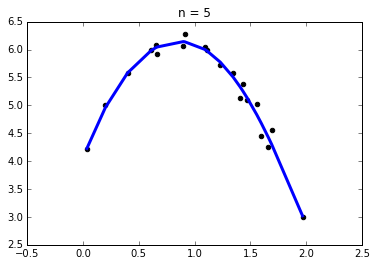

('Coefficients: \n', array([  7.45941253, -15.22975348,  23.72173192, -21.55381377,
         9.27207374,  -1.51250215]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0142483422079
Variance: 0.656483532668


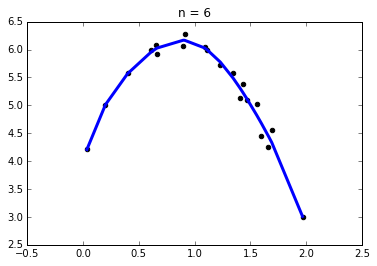

('Coefficients: \n', array([  5.80755004,  -3.68813319,  -8.69505696,  23.3897122 ,
       -23.40563945,  10.42743016,  -1.72816343]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0141552983311
Variance: 0.656576576544


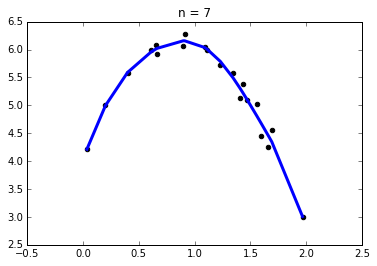

('Coefficients: \n', array([   9.06474378,  -31.40520425,   90.91632485, -162.52206432,
        171.49127637, -105.20304598,   34.48808182,   -4.64863641]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0140450514942
Variance: 0.656686823381


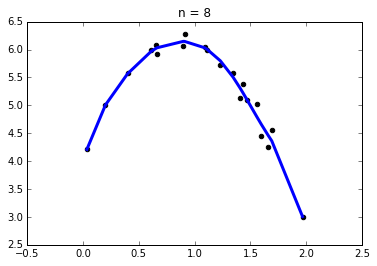

('Coefficients: \n', array([   -9.42840499,   152.66612318,  -717.58344134,  1748.59997791,
       -2477.44575393,  2112.06996526, -1067.56961802,   294.57422431,
         -34.15596577]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0133890543976
Variance: 0.657342820477


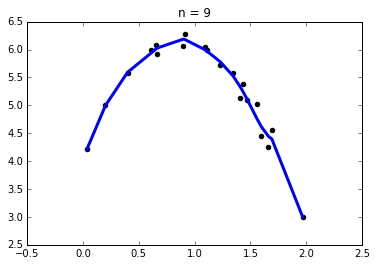

In [42]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    
    bias = np.mean((yhat - Y)**2)
    var = np.var(yhat)
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance explained score: %.2f' % regr.score(X, Y))

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

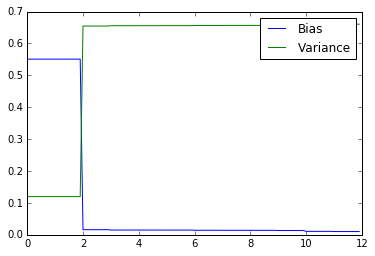

In [43]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    
    bias = np.mean((yhat - Y)**2)
    var = np.var(yhat)
    
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity


('Coefficients: \n', array([ 0.96498924]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.00663442921642
Variance: 0.277736266096


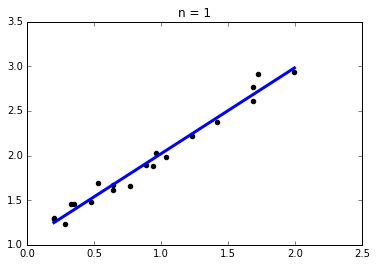

('Coefficients: \n', array([ 3.69261877]))
Variance score: 0.83
Residual sum of squares: 0.67
Bias: 0.846854116334
Variance: 4.2182339482


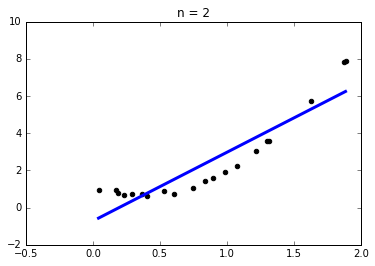

('Coefficients: \n', array([ 9.79523121]))
Variance score: 0.78
Residual sum of squares: 0.67
Bias: 9.0491687921
Variance: 31.7534462453


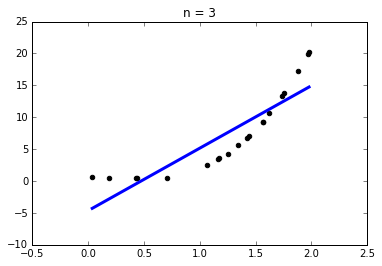

('Coefficients: \n', array([ 17.92659362]))
Variance score: 0.73
Residual sum of squares: 0.67
Bias: 35.2725505781
Variance: 97.470113864


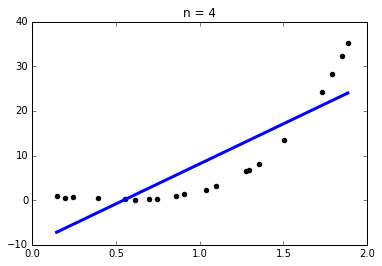

('Coefficients: \n', array([ 22.3364895]))
Variance score: 0.55
Residual sum of squares: 0.67
Bias: 132.525455732
Variance: 159.235644177


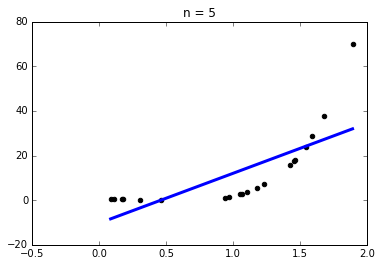

('Coefficients: \n', array([ 56.70944953]))
Variance score: 0.53
Residual sum of squares: 0.67
Bias: 1074.86736382
Variance: 1228.6070863


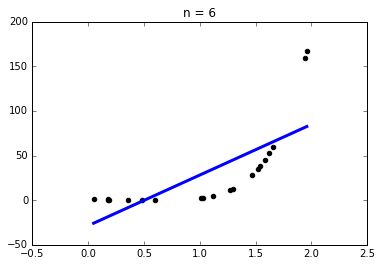

In [44]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    
    bias = np.mean((yhat - Y)**2)
    var = np.var(yhat)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance explained score: %.2f' % regr.score(X, Y))

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

# Advanced Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

('Coefficients: \n', array([-0.26506014]))
Variance score: 0.52
Residual sum of squares: 0.67
Bias: 0.221656046939
Variance: 0.241306872601


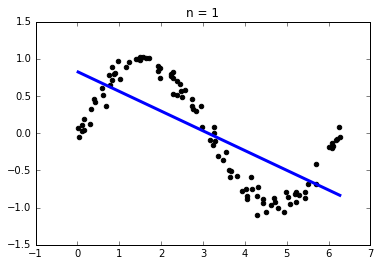

('Coefficients: \n', array([-0.24307991, -0.00355533]))
Variance score: 0.52
Residual sum of squares: 0.67
Bias: 0.221531163598
Variance: 0.241431755941


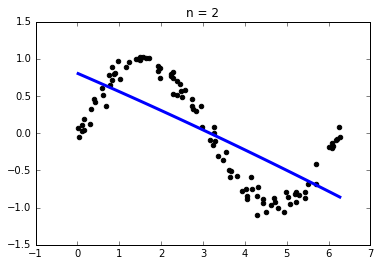

('Coefficients: \n', array([ 1.83543505, -0.84735526,  0.08971205]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0113552735378
Variance: 0.451607646002


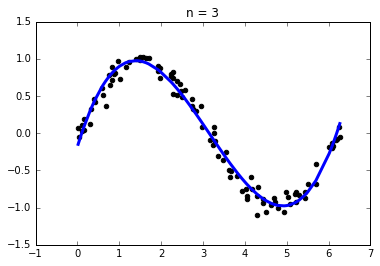

('Coefficients: \n', array([  1.83040630e+00,  -8.43658881e-01,   8.87924336e-02,
         7.29042100e-05]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0113549286245
Variance: 0.451607990915


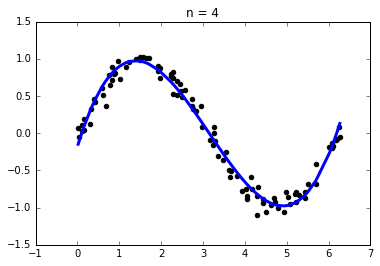

('Coefficients: \n', array([ 1.08540254,  0.03413735, -0.29432462,  0.06972391, -0.0044678 ]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.00819159871125
Variance: 0.454771320828


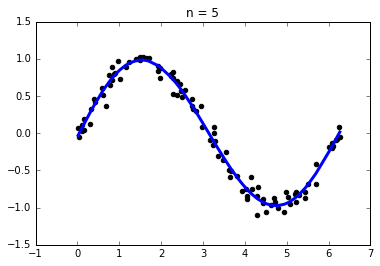

('Coefficients: \n', array([  1.03484477e+00,   1.21275391e-01,  -3.51954021e-01,
         8.72955877e-02,  -6.96153549e-03,   1.33382031e-04]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0081856223589
Variance: 0.454777297181


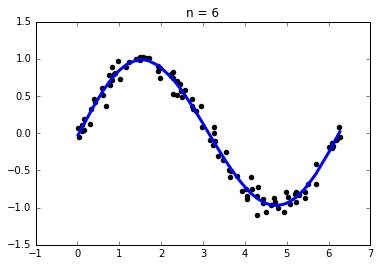

('Coefficients: \n', array([  9.66061129e-01,   2.78522042e-01,  -4.94799010e-01,
         1.50830743e-01,  -2.16921307e-02,   1.84210071e-03,
        -7.82800607e-05]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.00818051641393
Variance: 0.454782403133


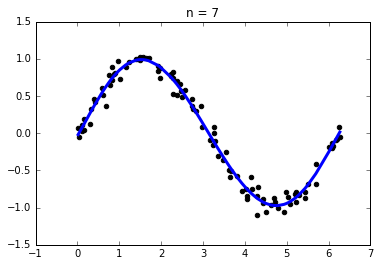

('Coefficients: \n', array([  6.44681593e-01,   1.21553564e+00,  -1.61125800e+00,
         8.25456895e-01,  -2.46926210e-01,   4.39297228e-02,
        -4.19994260e-03,   1.64666873e-04]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.00811949988182
Variance: 0.454843419817


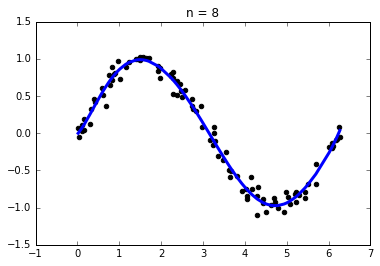

('Coefficients: \n', array([  1.17079971e-01,   3.14861954e+00,  -4.55113371e+00,
         3.13805880e+00,  -1.28621064e+00,   3.21043283e-01,
        -4.75380505e-02,   3.83508167e-03,  -1.29899186e-04]))
Variance score: 0.98
Residual sum of squares: 0.67
Bias: 0.0080189598441
Variance: 0.454943961431


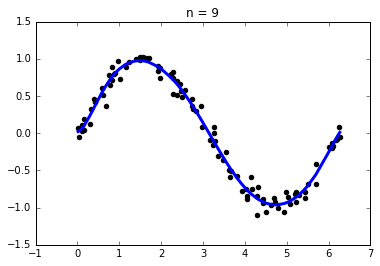

In [45]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    
    bias = np.mean((yhat - Y)**2)
    var = np.var(yhat)
    mse = np.mean()

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance explained score: %.2f' % regr.score(X, Y))

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))

    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

### Repeat the same exercise with the function

$$ y = e^x $$